In [83]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [84]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1020)>
[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1020)>
[nltk_data] Error loading wordnet: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1020)>


False

In [85]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100
reviews=[]

In [86]:
# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [87]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Appalling service with fai...
1,✅ Trip Verified | British Airways charge you f...
2,✅ Trip Verified | What is wrong with you guys?...
3,✅ Trip Verified | We booked two business cla...
4,✅ Trip Verified | I’ve flown with many airline...


### Data Analysis

In [88]:
# Data preprocessing 
#- remove stopwords
#- lemmatization
import regex as re

In [89]:
# Make a copy of the 'reviews' column in lowercase
df["reviews"] = df["reviews"].str.lower()

# Remove special characters
df["reviews"] = df["reviews"].apply(lambda x: re.sub('[^a-zA-Z0-9]+', ' ', x))

# Remove stopwords
df["reviews"] = df["reviews"].apply(lambda x: "  ".join([y for y in x.split() if y not in stopwords.words('english')]))

## Remove url 
df['reviews']=df["reviews"].apply(lambda x: re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '' , str(x)))

## Remove any additional spaces
df["reviews"]=df["reviews"].apply(lambda x: " ".join(x.split()))

# Remove Trip verified as 
df['reviews']= df['reviews'].apply(lambda x: " ".join([z for z in x.split() if z not in ['trip', 'verified'] ]))


In [90]:
df.head()

,reviews
0,appalling service failing defective fleet a380...
1,british airways charge pleasure choosing seat ...
2,wrong guys people pay lots money business clas...
3,booked two business class seat british airways...
4,flown many airlines recent experience british ...


In [91]:
#lemmatization to get the root word
from nltk.stem import WordNetLemmatizer

In [92]:
lemmatiser= WordNetLemmatizer()

In [93]:
def lemmatise_words(text):
    return " ".join([lemmatiser.lemmatize(word) for word in text.split()])

In [94]:
df["reviews"]= df["reviews"].apply(lambda x: lemmatise_words(x))

In [95]:
df.head()

,reviews
0,appalling service failing defective fleet a380...
1,british airway charge pleasure choosing seat p...
2,wrong guy people pay lot money business class ...
3,booked two business class seat british airway ...
4,flown many airline recent experience british a...


### POS tagging

In [96]:
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('punkt_tab')  # Download the punkt tokenizer
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Error loading punkt_tab: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1020)>
[nltk_data] Error loading averaged_perceptron_tagger_eng: <urlopen
[nltk_data]     error [SSL: CERTIFICATE_VERIFY_FAILED] certificate
[nltk_data]     verify failed: unable to get local issuer certificate
[nltk_data]     (_ssl.c:1020)>


False

In [97]:
def tokenize_text(text):
    return word_tokenize(text)
df["words"]= df["reviews"].apply(tokenize_text)

df["pos_tagged_words"]= df["words"].apply(pos_tag)

In [98]:
df

,reviews,words,pos_tagged_words
0,appalling service failing defective fleet a380...,"[appalling, service, failing, defective, fleet...","[(appalling, VBG), (service, NN), (failing, VB..."
1,british airway charge pleasure choosing seat p...,"[british, airway, charge, pleasure, choosing, ...","[(british, JJ), (airway, RB), (charge, NN), (p..."
2,wrong guy people pay lot money business class ...,"[wrong, guy, people, pay, lot, money, business...","[(wrong, JJ), (guy, NN), (people, NNS), (pay, ..."
3,booked two business class seat british airway ...,"[booked, two, business, class, seat, british, ...","[(booked, VBN), (two, CD), (business, NN), (cl..."
4,flown many airline recent experience british a...,"[flown, many, airline, recent, experience, bri...","[(flown, RB), (many, JJ), (airline, NN), (rece..."
...,...,...,...
995,grenada gatwick flown ba aircraft type prior r...,"[grenada, gatwick, flown, ba, aircraft, type, ...","[(grenada, NN), (gatwick, NN), (flown, VBN), (..."
996,prague london two hour flight 27th july delaye...,"[prague, london, two, hour, flight, 27th, july...","[(prague, JJ), (london, NN), (two, CD), (hour,..."
997,london dubai lately frequently flying premium ...,"[london, dubai, lately, frequently, flying, pr...","[(london, NN), (dubai, NN), (lately, RB), (fre..."
998,tel aviv toronto via london plane london toron...,"[tel, aviv, toronto, via, london, plane, londo...","[(tel, NN), (aviv, NN), (toronto, NN), (via, I..."


Now here data cleaning is done (stopwords are removed, stem words are extracted , pos tagging is given for machine to know better about the grammar of the sentences).
Now, for Data Analysis we are going to guve scores to reviews to get an idea whether they are positive, negative or neutral.

### VADER SENTIMENT SCORING

Here using nltk's  SentimentIntensityAnalyzer to get neg/pos/neu scores of the text.
Uses bag of words approach:
* stopwords should be removed
* each word is combined and gives a total

In [99]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
nltk.download('vader_lexicon')

sia= SentimentIntensityAnalyzer()

[nltk_data] Error loading vader_lexicon: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1020)>


In [100]:
df.head()

,reviews,words,pos_tagged_words
0,appalling service failing defective fleet a380...,"[appalling, service, failing, defective, fleet...","[(appalling, VBG), (service, NN), (failing, VB..."
1,british airway charge pleasure choosing seat p...,"[british, airway, charge, pleasure, choosing, ...","[(british, JJ), (airway, RB), (charge, NN), (p..."
2,wrong guy people pay lot money business class ...,"[wrong, guy, people, pay, lot, money, business...","[(wrong, JJ), (guy, NN), (people, NNS), (pay, ..."
3,booked two business class seat british airway ...,"[booked, two, business, class, seat, british, ...","[(booked, VBN), (two, CD), (business, NN), (cl..."
4,flown many airline recent experience british a...,"[flown, many, airline, recent, experience, bri...","[(flown, RB), (many, JJ), (airline, NN), (rece..."


In [101]:
res={}
for i , row in tqdm(df.iterrows(),total=len(df)):
    text= row['reviews']
    myid=i
    res[myid]=sia.polarity_scores(text)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [102]:
dff= df.reset_index()
dff

,index,reviews,words,pos_tagged_words
0,0,appalling service failing defective fleet a380...,"[appalling, service, failing, defective, fleet...","[(appalling, VBG), (service, NN), (failing, VB..."
1,1,british airway charge pleasure choosing seat p...,"[british, airway, charge, pleasure, choosing, ...","[(british, JJ), (airway, RB), (charge, NN), (p..."
2,2,wrong guy people pay lot money business class ...,"[wrong, guy, people, pay, lot, money, business...","[(wrong, JJ), (guy, NN), (people, NNS), (pay, ..."
3,3,booked two business class seat british airway ...,"[booked, two, business, class, seat, british, ...","[(booked, VBN), (two, CD), (business, NN), (cl..."
4,4,flown many airline recent experience british a...,"[flown, many, airline, recent, experience, bri...","[(flown, RB), (many, JJ), (airline, NN), (rece..."
...,...,...,...,...
995,995,grenada gatwick flown ba aircraft type prior r...,"[grenada, gatwick, flown, ba, aircraft, type, ...","[(grenada, NN), (gatwick, NN), (flown, VBN), (..."
996,996,prague london two hour flight 27th july delaye...,"[prague, london, two, hour, flight, 27th, july...","[(prague, JJ), (london, NN), (two, CD), (hour,..."
997,997,london dubai lately frequently flying premium ...,"[london, dubai, lately, frequently, flying, pr...","[(london, NN), (dubai, NN), (lately, RB), (fre..."
998,998,tel aviv toronto via london plane london toron...,"[tel, aviv, toronto, via, london, plane, londo...","[(tel, NN), (aviv, NN), (toronto, NN), (via, I..."


In [103]:
vaders=pd.DataFrame(res).T
vaders= vaders.reset_index()
vaders

,index,neg,neu,pos,compound
0,0,0.198,0.775,0.027,-0.8807
1,1,0.091,0.666,0.243,0.9724
2,2,0.243,0.731,0.026,-0.8644
3,3,0.170,0.796,0.034,-0.9001
4,4,0.108,0.500,0.392,0.9218
...,...,...,...,...,...
995,995,0.137,0.644,0.219,0.9369
996,996,0.134,0.703,0.163,0.2247
997,997,0.000,0.724,0.276,0.9182
998,998,0.000,0.689,0.311,0.9712


In [104]:
# lookup the list of column names in the dataframe
print("Columns in vaders:", vaders.columns.tolist())
print("Columns in dff:", dff.columns.tolist())


Columns in vaders: ['index', 'neg', 'neu', 'pos', 'compound']
Columns in dff: ['index', 'reviews', 'words', 'pos_tagged_words']


In [105]:
vaders= vaders.merge(dff,on='index',how='left')
vaders

,index,neg,neu,pos,compound,reviews,words,pos_tagged_words
0,0,0.198,0.775,0.027,-0.8807,appalling service failing defective fleet a380...,"[appalling, service, failing, defective, fleet...","[(appalling, VBG), (service, NN), (failing, VB..."
1,1,0.091,0.666,0.243,0.9724,british airway charge pleasure choosing seat p...,"[british, airway, charge, pleasure, choosing, ...","[(british, JJ), (airway, RB), (charge, NN), (p..."
2,2,0.243,0.731,0.026,-0.8644,wrong guy people pay lot money business class ...,"[wrong, guy, people, pay, lot, money, business...","[(wrong, JJ), (guy, NN), (people, NNS), (pay, ..."
3,3,0.170,0.796,0.034,-0.9001,booked two business class seat british airway ...,"[booked, two, business, class, seat, british, ...","[(booked, VBN), (two, CD), (business, NN), (cl..."
4,4,0.108,0.500,0.392,0.9218,flown many airline recent experience british a...,"[flown, many, airline, recent, experience, bri...","[(flown, RB), (many, JJ), (airline, NN), (rece..."
...,...,...,...,...,...,...,...,...
995,995,0.137,0.644,0.219,0.9369,grenada gatwick flown ba aircraft type prior r...,"[grenada, gatwick, flown, ba, aircraft, type, ...","[(grenada, NN), (gatwick, NN), (flown, VBN), (..."
996,996,0.134,0.703,0.163,0.2247,prague london two hour flight 27th july delaye...,"[prague, london, two, hour, flight, 27th, july...","[(prague, JJ), (london, NN), (two, CD), (hour,..."
997,997,0.000,0.724,0.276,0.9182,london dubai lately frequently flying premium ...,"[london, dubai, lately, frequently, flying, pr...","[(london, NN), (dubai, NN), (lately, RB), (fre..."
998,998,0.000,0.689,0.311,0.9712,tel aviv toronto via london plane london toron...,"[tel, aviv, toronto, via, london, plane, londo...","[(tel, NN), (aviv, NN), (toronto, NN), (via, I..."


In [106]:
# A new dataframe to give score of sentiments to our review
df_score = vaders[['compound','reviews']]
df_score.head()
def vader_analysis(value):
    if value >= 0.5:
        return 'Positive'
    elif value < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df_score['Analysis'] = df_score['compound'].apply(vader_analysis)
df_score.head()

/var/folders/1q/dnpwvw112w7bxtjst50whx0r0000gn/T/ipykernel_2236/484748548.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_score['Analysis'] = df_score['compound'].apply(vader_analysis)


,compound,reviews,Analysis
0,-0.8807,appalling service failing defective fleet a380...,Negative
1,0.9724,british airway charge pleasure choosing seat p...,Positive
2,-0.8644,wrong guy people pay lot money business class ...,Negative
3,-0.9001,booked two business class seat british airway ...,Negative
4,0.9218,flown many airline recent experience british a...,Positive


In [107]:
df_score['Analysis'].value_counts()

Analysis
Positive    453
Negative    435
Neutral     112
Name: count, dtype: int64

### Plotting

Now that we have found the scores of the sentiments, we plot them to analyze further the distributions of the scores

In [108]:
import matplotlib.pyplot  as plt
import seaborn as sns


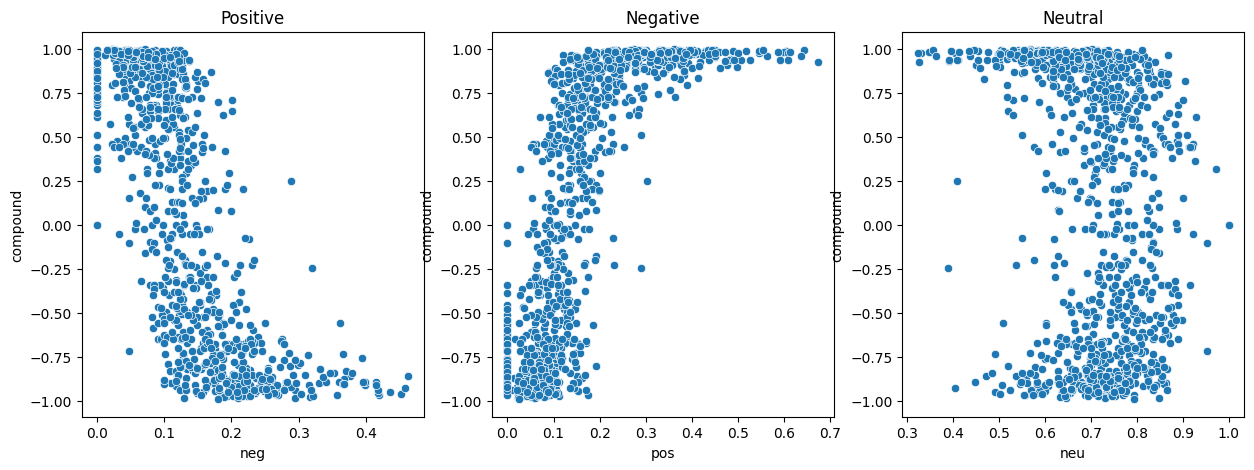

In [109]:
fig,axs =plt.subplots(1,3,figsize=(15,5))
sns.scatterplot(data= vaders,x='neg',y='compound',ax=axs[0])
sns.scatterplot(data= vaders,x='pos',y='compound',ax= axs[1])
sns.scatterplot(data= vaders,x='neu',y='compound',ax= axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Negative')
axs[2].set_title('Neutral')
plt.show()


#### More charts

In [110]:
vaders.head()

,index,neg,neu,pos,compound,reviews,words,pos_tagged_words
0,0,0.198,0.775,0.027,-0.8807,appalling service failing defective fleet a380...,"[appalling, service, failing, defective, fleet...","[(appalling, VBG), (service, NN), (failing, VB..."
1,1,0.091,0.666,0.243,0.9724,british airway charge pleasure choosing seat p...,"[british, airway, charge, pleasure, choosing, ...","[(british, JJ), (airway, RB), (charge, NN), (p..."
2,2,0.243,0.731,0.026,-0.8644,wrong guy people pay lot money business class ...,"[wrong, guy, people, pay, lot, money, business...","[(wrong, JJ), (guy, NN), (people, NNS), (pay, ..."
3,3,0.170,0.796,0.034,-0.9001,booked two business class seat british airway ...,"[booked, two, business, class, seat, british, ...","[(booked, VBN), (two, CD), (business, NN), (cl..."
4,4,0.108,0.500,0.392,0.9218,flown many airline recent experience british a...,"[flown, many, airline, recent, experience, bri...","[(flown, RB), (many, JJ), (airline, NN), (rece..."


In [112]:
pi_v= vaders.drop(['index','words','reviews','pos_tagged_words'],axis=1)
pi_v.head()

,neg,neu,pos,compound
0,0.198,0.775,0.027,-0.8807
1,0.091,0.666,0.243,0.9724
2,0.243,0.731,0.026,-0.8644
3,0.170,0.796,0.034,-0.9001
4,0.108,0.500,0.392,0.9218


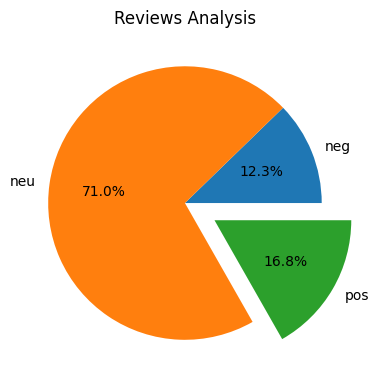

In [115]:
%matplotlib inline
plt.figure(figsize=(15,7))
avg_sentiment = pi_v[['neg', 'neu', 'pos']].mean()
plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(avg_sentiment.values, labels = avg_sentiment.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.show()